<a href="https://colab.research.google.com/github/fxpustoch/vol_project/blob/master/LTSM_KOSPI200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### **Reference:**

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

### Loading the dataset



In [0]:
from google.colab import files
uploaded = files.upload()

Saving KOSPI 200 Historical Data.csv to KOSPI 200 Historical Data (1).csv


In [0]:
dataset = pd.read_csv('KOSPI 200 Historical Data.csv')
dataset_values = dataset.iloc[:, 1:2].values

In [0]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 03, 2020",282.22,279.14,282.37,279.14,81.18K,2.22%
1,"Jun 02, 2020",276.08,272.65,276.45,272.22,247.72K,1.06%
2,"Jun 01, 2020",273.19,269.29,273.39,268.93,171.51M,1.81%
3,"May 29, 2020",268.32,266.62,269.61,265.23,269.47M,0.01%
4,"May 28, 2020",268.29,270.17,271.44,264.85,248.93M,0.24%


In [0]:
from datetime import datetime
dates_list = pd.to_datetime(dataset["Date"])


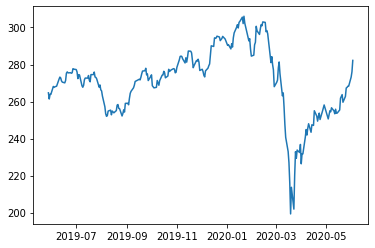

In [0]:
plt.clf()

x = dates_list[0:252]
y = dataset[0:252].iloc[:,1].values

plt.plot(x,y)

plt.show()

### Create Train & Test Sets

In [0]:
## Split the data in 20%/80% sets
train_data_size = int(dataset.shape[0]*0.8)
test_data_size  = int(dataset.shape[0]*0.2)
print("20% of the data_set is", test_data_size, "values")
print("80% of the data_set is", train_data_size, "values")

20% of the data_set is 960 values
80% of the data_set is 3840 values


In [0]:
## let's split the data in train and test sets:
dataset_test = dataset[0:test_data_size]
print(dataset_train.shape)
dataset_train = dataset[test_data_size+1:test_data_size+train_data_size +1]
print(dataset_test.shape)

(3840, 7)
(960, 7)


In [0]:
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(20, train_data_size):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
print(y_train)

[0.78438395 0.78185572 0.78206641 ... 0.03097084 0.03109725 0.02241699]


### Building LTSM Model

In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3820/3820 [==============================] - 6s 2ms/step - loss: 0.0193
Epoch 2/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0041
Epoch 3/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0040
Epoch 4/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0041
Epoch 5/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0041
Epoch 6/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0033
Epoch 7/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0031
Epoch 8/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0031
Epoch 9/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0030
Epoch 10/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0029
Epoch 11/100
3820/3820 [==============================] - 5s 1ms/step - loss: 0.0027
Epoch 12/100
3820/3820 [==============================] - 5s 1ms/step - lo

In [0]:
X_test = []
y_test = []

test_set = dataset_test.iloc[:, 1:2].values
inputs = test_set.reshape(-1,1)
inputs = sc. transform(inputs)

for i in range(20, test_data_size):
    X_test.append(inputs[i-20:i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

real_stock_price = dataset_test.iloc[0:, 1:2].values

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price).tolist()

In [0]:
time = pd.to_datetime(dataset["Date"][0:test_data_size-20])

In [0]:
print(predicted_stock_price)

[[253.15065002441406], [252.87611389160156], [250.1509552001953], [254.06814575195312], [255.08401489257812], [253.52748107910156], [249.79151916503906], [250.9097442626953], [250.9326629638672], [248.84344482421875], [249.60757446289062], [252.2892303466797], [248.01092529296875], [245.7828369140625], [243.24696350097656], [245.44970703125], [245.1852264404297], [241.99758911132812], [242.51409912109375], [240.89654541015625], [234.25003051757812], [231.37310791015625], [228.02137756347656], [233.20462036132812], [233.32199096679688], [232.75877380371094], [229.84963989257812], [230.9413299560547], [224.57455444335938], [210.5282745361328], [210.6887664794922], [205.82936096191406], [211.7616729736328], [222.65469360351562], [230.07029724121094], [236.19924926757812], [242.7557830810547], [251.59661865234375], [259.9299011230469], [261.09326171875], [268.9378967285156], [276.7681884765625], [276.05322265625], [270.2019958496094], [267.7568054199219], [266.40325927734375], [272.1098022

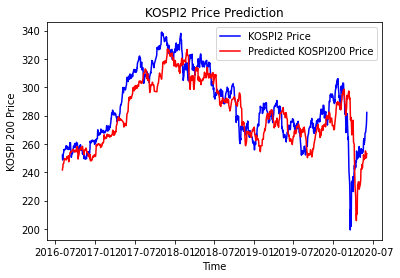

In [0]:
plt.plot(time, real_stock_price[:len(real_stock_price)-20], color = 'blue', label = 'KOSPI2 Price')
plt.plot(time, predicted_stock_price, color = 'red', label = 'Predicted KOSPI200 Price')
plt.title('KOSPI2 Price Prediction')
plt.xlabel('Time')
plt.ylabel('KOSPI 200 Price')
plt.legend()
plt.show()

### Check the difference between Predicted and Real Index Price

In [0]:
difference = real_stock_price - predicted_stock_price

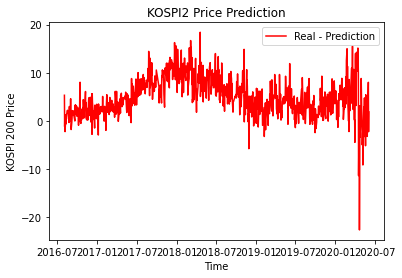

In [0]:

plt.plot(time, difference, color = 'red', label = 'Real - Prediction')
plt.title('KOSPI2 Price Prediction')
plt.xlabel('Time')
plt.ylabel('KOSPI 200 Price')
plt.legend()
plt.show()

### Comparing with Moving Average

In [0]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
moving_average = dataset.sort_values('Date', ascending=True)

moving_average["MA20"] = moving_average.iloc[:,1].rolling(window = 20).mean()

moving_average = moving_average.sort_values('Date', ascending=False)

moving_average.head()

,Date,Price,Open,High,Low,Vol.,Change %,MA20
0,2020-06-03,282.22,279.14,282.37,279.14,81.18K,2.22%,262.5905
1,2020-06-02,276.08,272.65,276.45,272.22,247.72K,1.06%,261.2295
2,2020-06-01,273.19,269.29,273.39,268.93,171.51M,1.81%,259.9555
3,2020-05-29,268.32,266.62,269.61,265.23,269.47M,0.01%,259.2035
4,2020-05-28,268.29,270.17,271.44,264.85,248.93M,0.24%,258.6070


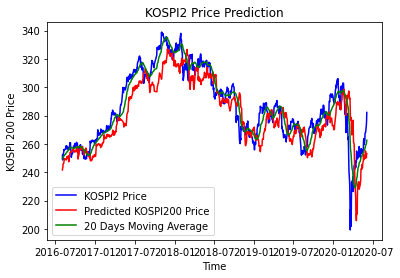

In [0]:
plt.plot(time, real_stock_price[:test_data_size - 20], color = 'blue', label = 'KOSPI2 Price')
plt.plot(time, predicted_stock_price, color = 'red', label = 'Predicted KOSPI200 Price')
plt.plot(time, moving_average["MA20"][:test_data_size - 20], color = 'green', label = '20 Days Moving Average')
plt.title('KOSPI2 Price Prediction')
plt.xlabel('Time')
plt.ylabel('KOSPI 200 Price')
plt.legend()
plt.show()

